In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    

)
test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def norm(img,label):
    image  = tf.cast(img/255,tf.float32)
    return image,label

In [7]:
train_data = train_data.map(norm)
test_data = test_data.map(norm)

In [8]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
## Model building

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
his = model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 77s 116ms/step - loss: 1.3182 - accuracy: 0.6044 - val_loss: 0.5709 - val_accuracy: 0.7128
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5532 - accuracy: 0.7215 - val_loss: 0.4932 - val_accuracy: 0.7624
Epoch 3/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4851 - accuracy: 0.7635 - val_loss: 0.4468 - val_accuracy: 0.7944
Epoch 4/10
625/625 [==============================] - 72s 114ms/step - loss: 0.4140 - accuracy: 0.8091 - val_loss: 0.4552 - val_accuracy: 0.7946
Epoch 5/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4196 - accuracy: 0.8195 - val_loss: 0.4327 - val_accuracy: 0.7984
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3236 - accuracy: 0.8651 - val_loss: 0.4310 - val_accuracy: 0.8110
Epoch 7/10
625/625 [==============================] - 71s 114ms/step - loss: 0.2471 - accuracy: 0.8960 - val_loss: 0.6721 - val_ac

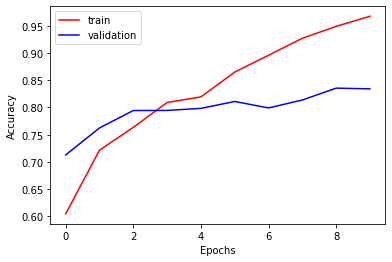

In [12]:
plt.plot(his.history['accuracy'],color='red',label='train')
plt.plot(his.history['val_accuracy'],color='blue',label='validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
## Testing on new Images

In [14]:
import cv2

In [15]:

def predict_image(imag):
  imag = cv2.resize(imag,(256,256))
  test_input = imag.reshape((1,256,256,3))# 1 means our batch size is 1 remaining three dimensions are image dimension
  pred = model.predict(test_input,verbose=0)[0][0]
  if pred == 1:
    print("It is a dog")
  else:
    print("It is a cat")
  
  return

In [16]:
im1 = cv2.imread('/content/d1.jpg')

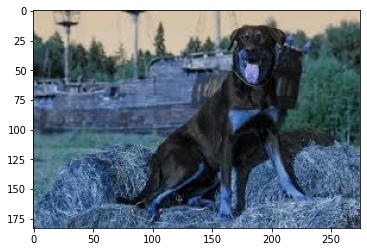

In [17]:
plt.imshow(im1)

In [18]:
predict_image(im1)

It is a dog


In [19]:
im2 =cv2.imread('/content/c1.jpg')

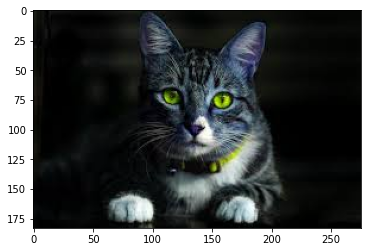

In [20]:
plt.imshow(im2)

In [21]:
predict_image(im2)

It is a cat
